<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/7_%EB%AA%A8%EB%93%88%EA%B3%BC_%ED%8C%8C%EC%9D%BC_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%99%80_%EB%94%94%EB%B2%84%EA%B9%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
모듈
   파이썬 코드를 가지고 있는 .py 파일
   재사용 가능한 함수, 클래스 ,변수를 포함
   import 로 다른 파일의 코드를 가져와서 사용
```

In [ ]:
# 모듈의 사용 예
import random
random.randint(1,101)

71

In [ ]:
# /content/drive/MyDrive/module/myModule.py  --> 파일 생성
# 구글드라이브에 있는 py파일을 import 하기
# 모듈경로를 python 경로에 추가
import sys
sys.path.append('/content/drive/MyDrive/module')

# student.py에 파일저장을 위해서 dict 구조 생성 및 변환기능 추가
  - 데이터를 파일에 저장하고 불러오기

```
student.py

class Student:
  def __init__(self,name,age,scores):
    self.name = name
    self.age = age
    self.scores = scores
  def get_average(self):
    return sum( self.scores.values() ) / len(self.scores)
  def __str__(self) -> str:
    return f'{self.name} {self.age} {self.scores}'    
  # 저장을 위해서 데이터를 dict 구조로 만듦  - json형태
  def to_dict(self):
    return { "name":self.name, "age":self.age, 'scores':self.scores  }
  
  @classmethod  # 1, 클래스변수를 다루기위해서, 2.객체를 통하지 않아도 되는 메소드
  def from_dict(cls,data):
    return cls(data['name'], data['age'], data['scores'])
```

```
# 파일생성 및 불러오기
# import json  --> 문자열 형태의 dict 구조를 실제 dict 로 변환
import sys
sys.path.append('/content/drive/MyDrive/module')  # 드라이브 경로를 시스템 path에 저장

import json  # 딕셔너리 형태의 객체를 문자열로 저장하고 다시 객로 만듦
from student import Student  # 우리가만 든 student.py의 내용을 가져옮

# 학생객체를 파일에 저장 함수
# students = [s1,s2 ....]
# 객체의 모든 데이터를 딕셔너리로 변환한후 json을 이용해서 문자열형태로 파일에 저장
def save_students(students, filename = '/content/drive/MyDrive/data/student.json'):
  data = [  student.to_dict() for student in students  ]
  with open(filename,'w',encoding='utf-8') as f:
    json.dump(data,f,ensure_ascii=False,indent=2)

# json형태(문자열로 된 dict)된 문자열을 읽어서 실제 객체로 반환 --> 리스트
def load_students(filename = '/content/drive/MyDrive/data/student.json'):
  with open(filename,'r',encoding='utf-8') as f:
    data = json.load(f)  # 딕셔너리들을 포함하는 리스트
  return [ Student.from_dict(student) for student in data ]  # [{},{},{}]  Student( , , ,) --> [객체,객체]

# 사용
s1 = Student('홍길동',20,{'kor':100,'eng':98,'math':95})
s2 = Student('이순신',20,{'kor':99,'eng':88,'math':75})
students = [s1,s2]
save_students(students)  # 객체 데이터를 파일로 저장
# 불러오기
loaded_student = load_students()
for student in loaded_student:
  print(student)  # __str__
```

# 저장 및 불러오기 기능을 모듈화  storage.py

```
storage.py

# 객체의 모든 데이터를 딕셔너리로 변환한후 json을 이용해서 문자열형태로 파일에 저장
import json
def save_students(students, filename = '/content/drive/MyDrive/data/student.json'):
  data = [  student.to_dict() for student in students  ]
  with open(filename,'w',encoding='utf-8') as f:
    json.dump(data,f,ensure_ascii=False,indent=2)

# json형태(문자열로 된 dict)된 문자열을 읽어서 실제 객체로 반환 --> 리스트
def load_students(filename = '/content/drive/MyDrive/data/student.json'):
  with open(filename,'r',encoding='utf-8') as f:
    data = json.load(f)  # 딕셔너리들을 포함하는 리스트
  return data

```

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
from student import Student
from storage import save_students, load_students

# 학생 객체 생성
students = [
  Student('홍길동',20,{'kor':100,'eng':98,'math':95}),
  Student('이순신',20,{'kor':99,'eng':88,'math':75}),
  Student('유관순',20,{'kor':88,'eng':77,'math':66}),
  Student('강감찬',20,{'kor':77,'eng':66,'math':55}),
  Student('김유신',20,{'kor':66,'eng':55,'math':44}),
]
save_students(students)

In [ ]:
# 데이터 불러오기
loaded_students = load_students()
for student in loaded_students:
  print(student)

{'name': '홍길동', 'age': 20, 'scores': {'kor': 100, 'eng': 98, 'math': 95}}
{'name': '이순신', 'age': 20, 'scores': {'kor': 99, 'eng': 88, 'math': 75}}
{'name': '유관순', 'age': 20, 'scores': {'kor': 88, 'eng': 77, 'math': 66}}
{'name': '강감찬', 'age': 20, 'scores': {'kor': 77, 'eng': 66, 'math': 55}}
{'name': '김유신', 'age': 20, 'scores': {'kor': 66, 'eng': 55, 'math': 44}}


# 테스트
  - 코드가 예상대로 동작하는 확인하는 과정
  - 다양한 도구
     - unitest 모듈  : 단위테스트

In [ ]:
# unittest로 Student 클래스 테스트
import sys
sys.path.append('/content/drive/MyDrive/module')

import unittest
from student import Student
class TestStudent(unittest.TestCase):
  def test_get_average(self):
    student = Student('홍길동',20,{'kor':100,'eng':98,'math':95})
    self.assertEqual(round(student.get_average()),98)  # 테스트 코드
  def test_str(self):
    student = Student('홍길동',20,{'kor':100,'eng':98,'math':95})
    self.assertEqual(str(student),"홍길동 20 {'kor': 100, 'eng': 98, 'math': 95}")
    self.assertIn('홍길동',str(student))
  def test_to_dict(self):
    student = Student('홍길동',20,{'kor':100,'eng':98,'math':95})
    self.assertEqual(student.to_dict(),
     {'name': '홍길동', 'age': 20, 'scores': {'kor': 100, 'eng': 98, 'math': 95}}
                     )

# __name__  해당 변수가 적용된 곳이 모듈이 아니면 __main__을 출력하고 이 코드가
# 모듈에서 작성되었다면 __모듈명__ 출력
# if __name__ == '__main__':    모듈을 만들고 해당모듈을 해당 py파일에서 동작 테스트할때 사용

if __name__ == '__main__':
  unittest.main(argv=[''], exit=False)  # 코렙셀이 종료되지 않도록

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


```
- 정리
  - 모듈
    - py로 되어 있는 파일을 외부 다른파일에서 import 파일명
    - 파일명이 모듈명
    - 코렙에서는 세션을 초기화 해야 모듈이 변경된 것을 인식
    - 구글 드라이브에 모듈을 정의하고 사용하려면 시스템 path에 모듈 경로를 저장해야 한다
  - 단위테스트
  - 디버깅의 의미
    - 가장오래되고 간단한 디버깅은 print를 활용해서 중간 결과를 확인
    - VisualStudioCode 와 같은 IDE 에서 제공하는 디버깅 기능을 이용한다
  - 데이터를 보전하기 위해서 파일에 객체를 저장하고 객체로 불러오기
    - json을 이용해서 가능
      - key:value형태로 이루어진 집합으로 문자열형태로 되어 있다
```

In [ ]:
# 예외처리
# 패키지 - 모듈의 집합
# Streamit - 웹 GUI

```
예외처리
  try         : 예외를 처리하는 코드 블럭
  except      : 예외를 잡아서 처리 블럭
  else        : 예외가 발생하지 않았을때 처리 블럭
  finally     : 예외가 발생하던 안하던 항상 처리되는 블럭  
  raise       : 의도적으로 예외발생
```

In [ ]:
score = []
try:
  avg = sum(score) / len(score)
  print(f'평균은 : {avg:.2f}')
# except Exception as e:  # 모든 csae Exception을 받아서 처리
except ZeroDivisionError:
  print('점수가 없어서 0으로 나눌수 없습니다.')

점수가 없어서 0으로 나눌수 없습니다.


In [ ]:
# 여러 예외가 발생가능할때
score = [10,20]
try:
  avg = sum(score) / len(score)
  print(f'평균은 : {avg:.2f}')
  print(score[0])
  with open('울라라.txt','r') as f:
    print(f.read())
# except Exception as e:  # 모든 csae Exception을 받아서 처리
except ZeroDivisionError:
  print('점수가 없어서 0으로 나눌수 없습니다.')
except IndexError:
  print('인덱스의 유효범위가 아닙니다.')
except Exception as e:
  print(e)


print("이문장이 보인다면 정상적으로 종료된 것입니다.")

평균은 : 15.00
10
[Errno 2] No such file or directory: '울라라.txt'
이문장이 보인다면 정상적으로 종료된 것입니다.


# else , finally

In [ ]:
def get_average(score):
  try:
    total = sum(score)
    count = len(score)
    result = total / count
  except ZeroDivisionError:
    print('점수가 없으면 안됩니다.')
    return None
  except Exception as e:
    print(e)
    return None
  else:  # 예외가 발생하지 않으면 실행되는 블럭
    print('평균 계산완료')
    return result
  finally:
    print('평균계산 시도 완료')

In [ ]:
data = [1,2,3,4,5]
print( get_average(data) )

평균 계산완료
평균계산 시도 완료
3.0


In [ ]:
isinstance(data,list)

True

In [ ]:
# 문자열형태로 입력받느 숫자를 정수형면 정수 , 실수형태면 실수로 변환
# '123'  isdigit, isNumeric
str_number = input('숫자를 입력하세요')
try:
  if str_number.isdigit():
    number = int(str_number)
  else:
    number = float(str_number)

except Exception:
  print('정수나 실수형태의 숫자만 입력 가능합니다.')
else:
  print(f'입력한 값 * 5 = {number*5}')
finally:
  print('로직을 종료합니다.')


숫자를 입력하세요12,5
정수나 실수형태의 숫자만 입력 가능합니다.
로직을 종료합니다.


In [ ]:
class Test:
  pass
t = Test()
type(t) == Test  ,  isinstance( t,Test)

(True, True)

```
패키지 : 모듈( .py)을 계층적으로 묶은 디렉터리
  디렉터리 안에 __init__.py파일(패키지임을 표시, python3.3 이상부터는 생략가능하지만 가독성을 위해서 명시적으로 표시)
  MyPackage
    |
     -- __init__.py
     -- my_module1.py
     -- my_module2.py

my_module1.py

class MyModule1:
  def __init__(self,data) -> None:
    self.data = data
  def __str__(self) -> str:
    return f'MyModule1 data:{self.data}'
     
```

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')

# package 사용하기
from MyPackage.my_module1 import MyModule1
from MyPackage.my_module2 import MyModule2

m1 = MyModule1(10)
m2 = MyModule2(20)
print(m1)
print(m2)

MyModule1 data:10
MyModule2 data:20


# __init __.py 활용
   - 패키지 초기화
    - 여기서 모듈을 미리 임포트해서 편리하게 사용

```
__init__.py

from .my_module1 import MyModule1
from .my_module2 import MyModule2

print('MyPackage  패키지 초기화')
```    

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')

from MyPackage import MyModule1, MyModule2
s1 = MyModule1(10)
s2 = MyModule2(20)
print(s1)
print(s2)

MyModule1 data:10
MyModule2 data:20


# steamit
```
오픈소스 프레임워크로 데이터중심의 웹 앱을 빠르게 만들기 위해
  HTML/CSS/Javascrip 없이 파이썬만으로 UI 구성
  실시간
  데이터시각화 및 머신러닝 모델 베포에 최적화
  프론트나 백엔트 지식없어도 제작
```

# Streamlit & ngrok

In [ ]:
!pip install streamlit pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st

st.title('streamlit 테스트입니다.')
st.write('안녕하세요  테스트 중입니다. 본문내용입니다')

Writing app.py


```
https://ngrok.com/  가입해서 token값을 가져온다

자신의 token 값으로 환경셋팅한다
```

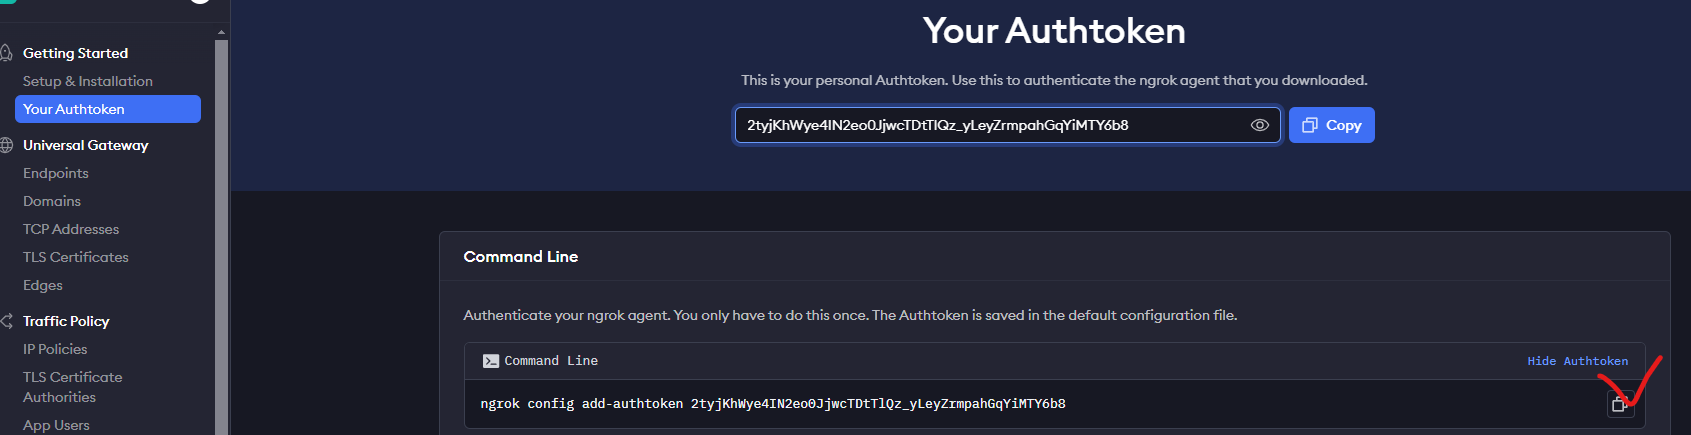

In [ ]:
!ngrok config add-authtoken 2tyjKhWye4IN2eo0JjwcTDtTlQz_yLeyZrmpahGqYiMTY6b8

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
# 기존 터널 중료(중복방지)
ngrok.kill()

#streamlit 실행  아주 작은 경량화된 웹 서버
!streamlit run app.py &>/dev/null&  # 백그라운드 환경에서 동작

# Ngrok 터널 생성 : streamlit을 외부로 연결해주는 터널 : 터널링
url = ngrok.connect(8501)  # ngrok를 사용해서 공개 url 생성
print(f'Streamlit url : {url}')

Streamlit url : NgrokTunnel: "https://f692-34-58-58-82.ngrok-free.app" -> "http://localhost:8501"


# Streamlit & npx( 리눅스 자체에서 외부로 연결할수 있는 터널링 제공)

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
# 앱 작성
%%writefile app.py
import sys
sys.path.append('/content/drive/MyDrive/module')

import streamlit as st
from student import Student
import json

# 입력 ui
st.title('학생관리 프로그램')
name =  st.text_input("이름")
age =  st.number_input("나이", min_value=0, step=1)
scores_input =  st.text_input("과목과 점수: ex(kor:90, eng:85)")  # "  {"kor": 90, "eng": 85}  "


# 입력데이터 표시
if st.button('학생추가'):
  score_dict = json.loads(scores_input)  # {"kor": 90, "eng": 85}
  student = Student(name,age,score_dict)
  st.write(f'평균점수 : {student.get_average():.2f}')


Overwriting app.py


In [ ]:
# 공용ip 확인(Turnnel Password 사용)
!curl ipv4.icanhazip.com

34.170.248.81


In [ ]:
# Streamit 백그라운드로 실행
!streamlit run app.py &>/dev/null &

!npx localtunnel --port 8501 --yes # --yes 설치확인 자동화

⠙⠹⠸⠼⠴⠦your url is: https://plenty-poets-obey.loca.lt
^C
